In [2]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import csv
import datetime
import gsw
import glob
import matplotlib as mpl
from matplotlib import colors
import matplotlib.cm as cm
#import matplotlib.colormaps as cmaps
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mpl_toolkits.axes_grid1.inset_locator as inset_axes
import numpy.ma as ma
import numpy as np
from numpy import linspace
import os
import pandas as pd
#import rasterio.plot
import scipy.io
from scipy.interpolate import griddata
#import seaborn as sns
import seawater
import seawater.eos80 as sw
import xarray as xr
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
from shapely.geometry import LineString, MultiLineString, Point, Polygon
from shapely.ops import unary_union


mpl.style.use('seaborn-muted')
#mpl.rc('font', family ='Arial')

/tmp/ipykernel_1565253/576144183.py:39: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-muted')


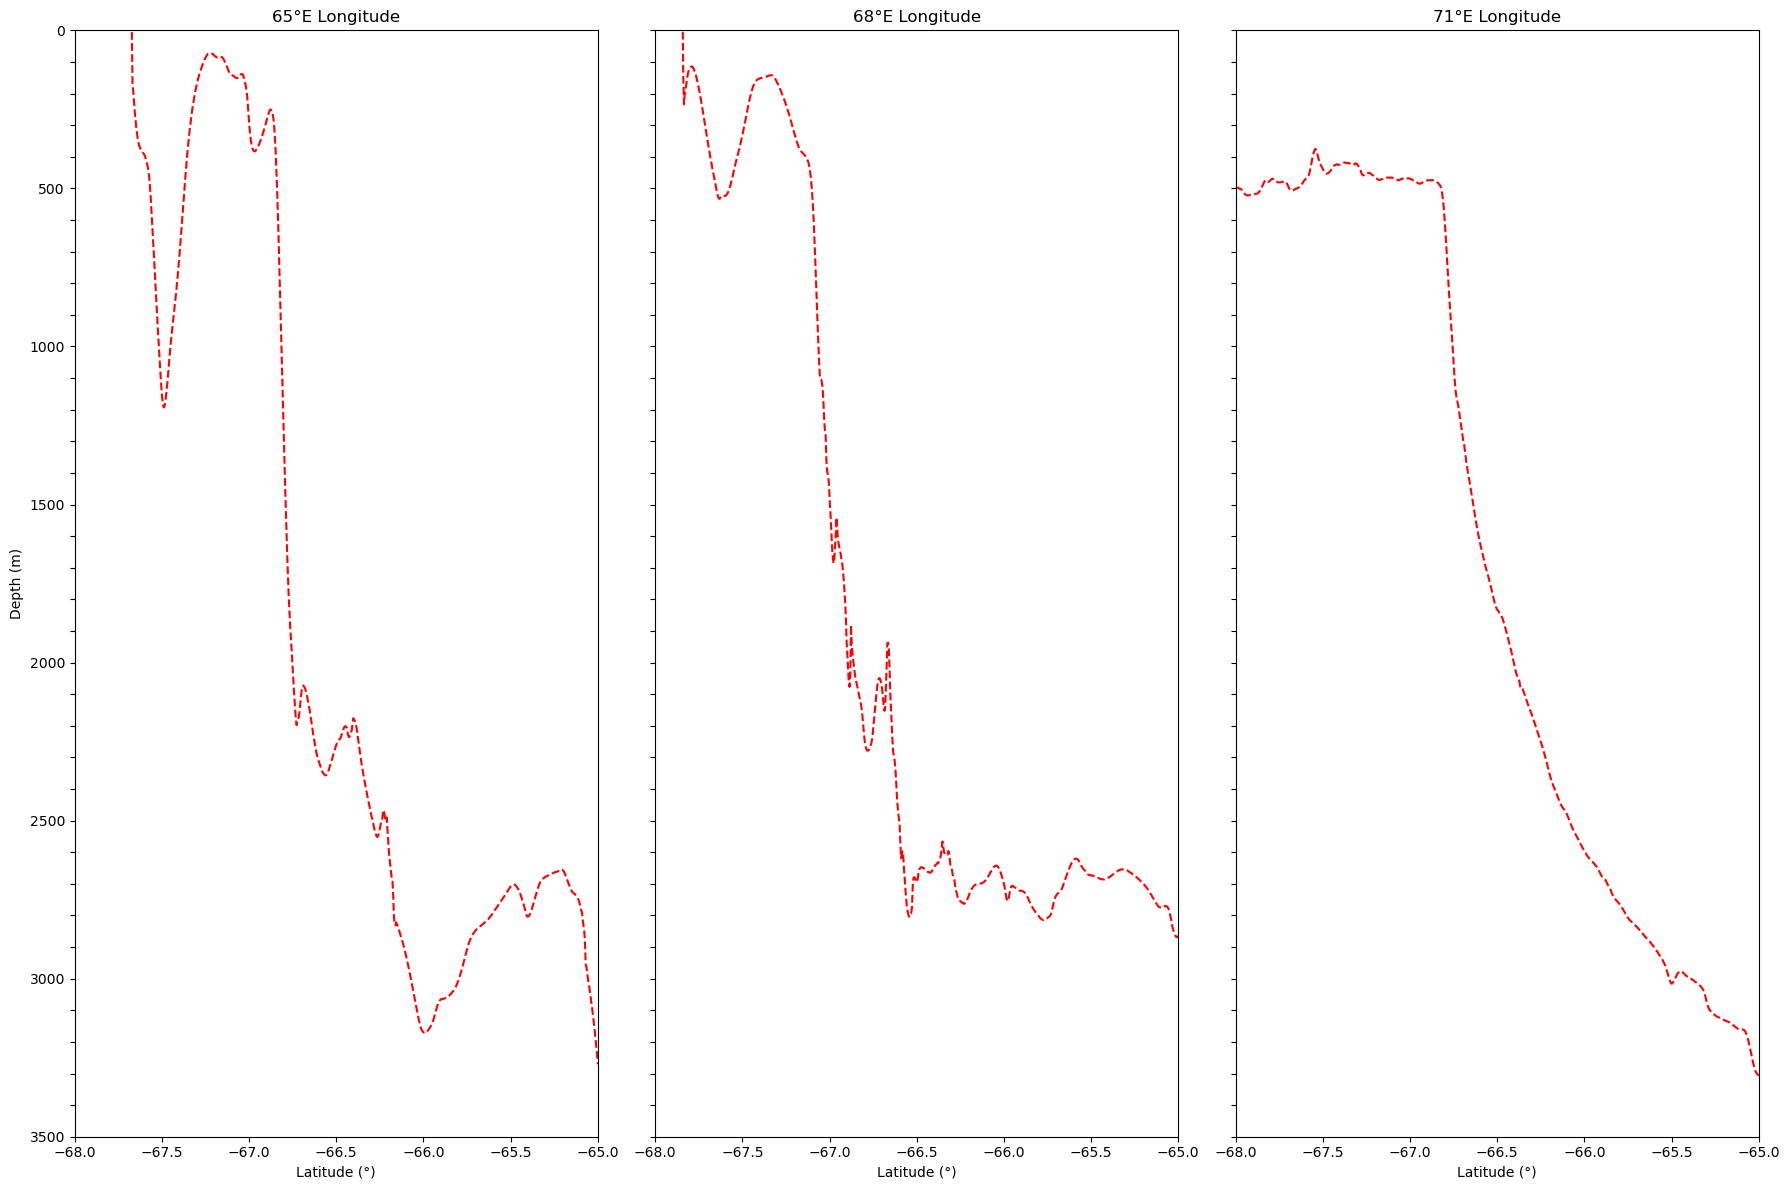

In [10]:
# Open the NetCDF file with xarray
gebco_full = xr.open_dataset('../Data/Final/bathymetry_data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Define the longitude lines
longitude_lines = [65, 68, 71]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 12), sharey=True)

# Iterate through each longitude line
for i, lon in enumerate(longitude_lines):
    # Extract bathymetry data for the longitude line
    bathymetry_along_transect = gebco_full.sel(lon=lon, method='nearest')
    
    # Extract latitude and depth values
    latitude_values = bathymetry_along_transect['lat'].values
    depth_values = -bathymetry_along_transect['elevation'].values  # Negative values because bathymetry is negative
    
    # Plot the seafloor depths along the longitude line
    axs[i].plot(latitude_values, depth_values, color='red', linestyle='--', label='Seafloor')
    axs[i].set_xlabel('Latitude (°)')
    axs[i].set_title(f'{lon}°E Longitude')
    # axs[i].grid()

    # Set y-axis limits from 0 to the maximum depth
    axs[i].set_ylim(0, 3500)
    axs[i].set_xlim(-68, -65)

    # Add tick marks every 100m but leave labels every 500m
    axs[i].set_yticks(range(0, 3501, 100))
    axs[i].set_yticklabels(['' if j % 500 != 0 else f'{j}' for j in range(0, 3501, 100)])


# Set common ylabel and invert y-axis for all subplots
axs[0].set_ylabel('Depth (m)')
axs[0].invert_yaxis()


# Adjust layout to prevent clipping of ylabel
plt.tight_layout()

# Show the plot
plt.show()


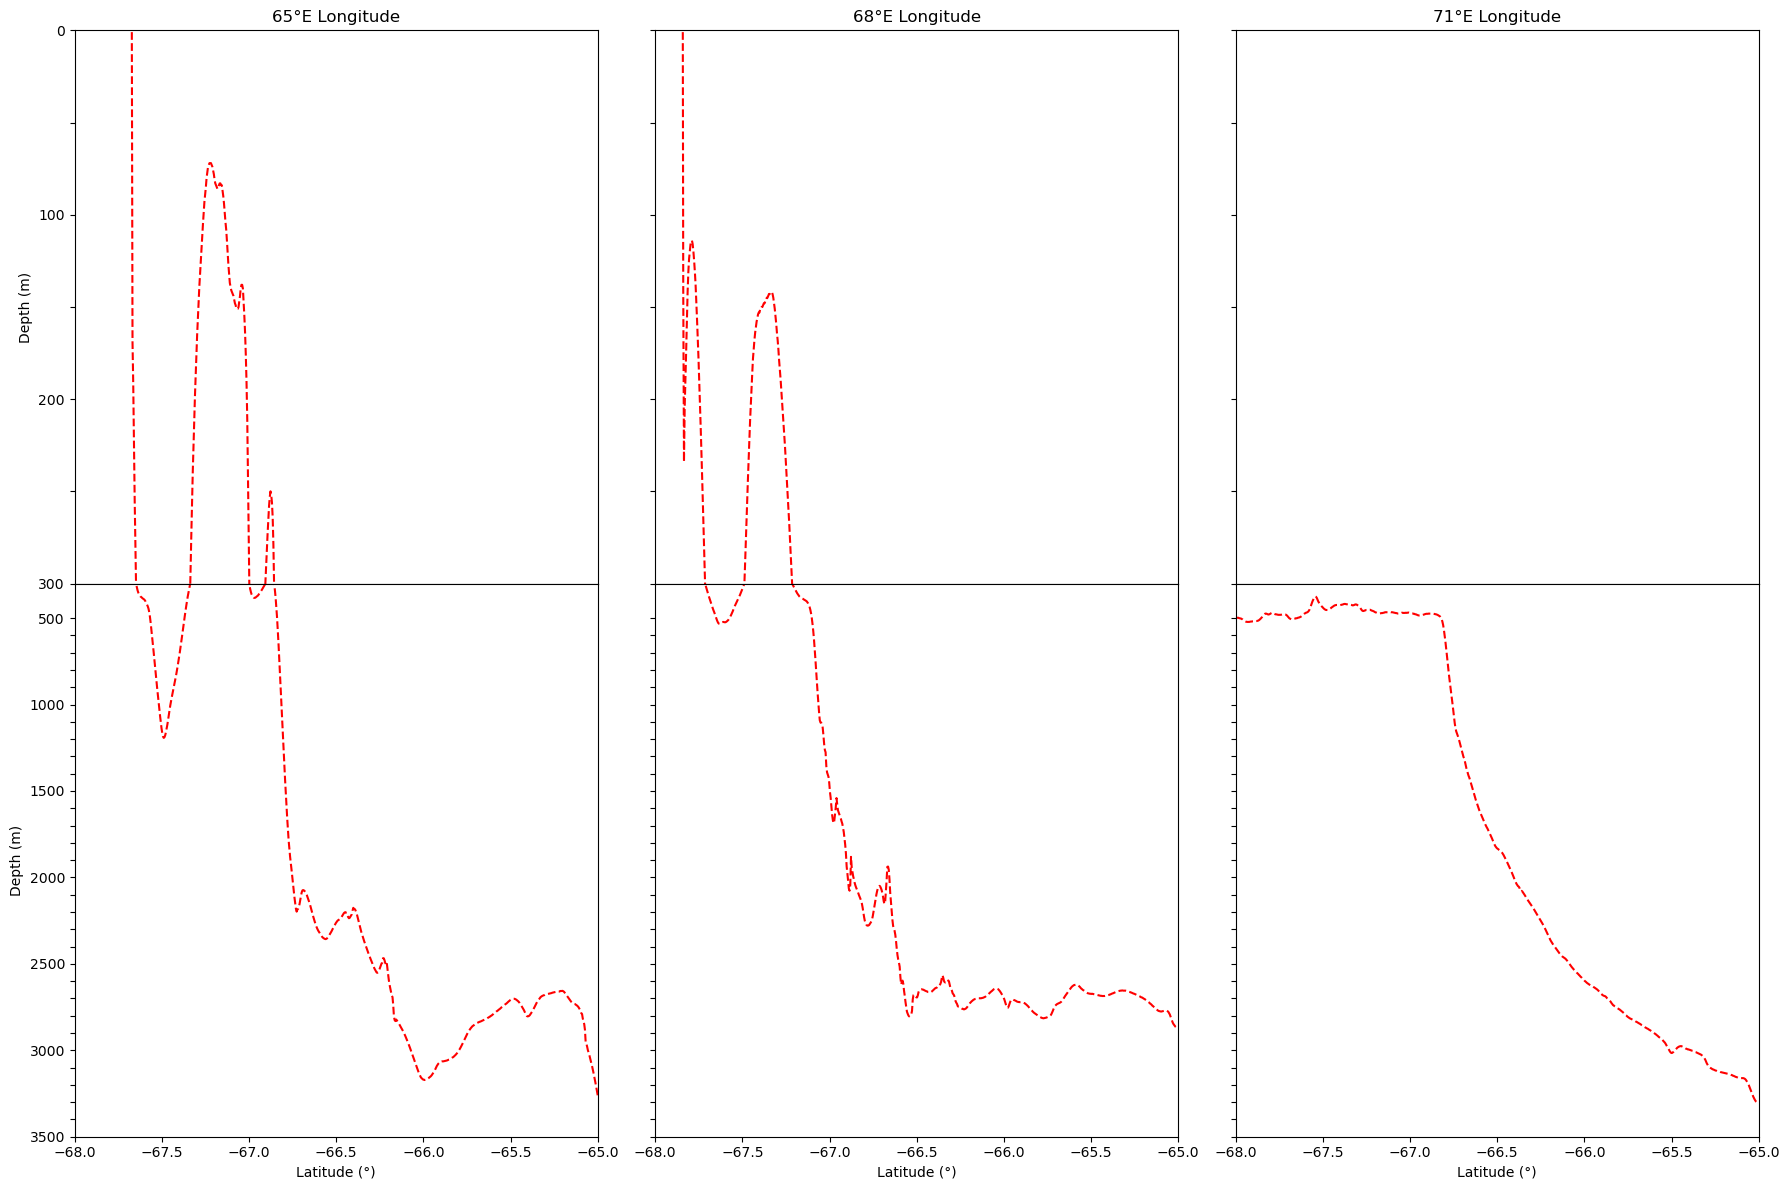

In [5]:
# Open the NetCDF file with xarray
gebco_full = xr.open_dataset('../Data/Final/bathymetry_data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Define the longitude lines
longitude_lines = [65, 68, 71]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharey='row', gridspec_kw={'height_ratios': [1, 1], 'hspace': 0})

# Iterate through each longitude line
for i, lon in enumerate(longitude_lines):
    # Extract bathymetry data for the longitude line
    bathymetry_along_transect = gebco_full.sel(lon=lon, method='nearest')
    
    # Extract latitude and depth values
    latitude_values = bathymetry_along_transect['lat'].values
    depth_values = -bathymetry_along_transect['elevation'].values  # Negative values because bathymetry is negative
    
    # Plot the seafloor depths along the longitude line
    axs[0, i].plot(latitude_values, depth_values, color='red', linestyle='--', label='Seafloor')
    axs[0, i].set_title(f'{lon}°E Longitude')
    axs[0, i].set_ylim(0, 300)
    axs[0, i].set_xlim(-68, -65)
    axs[0, i].set_xticks([])  # Remove x-axis ticks
    axs[0, i].set_xticklabels([])

    # Add tick marks every 100m but leave labels every 500m
    axs[0, i].set_yticks(range(0, 301, 50))
    axs[0, i].set_yticklabels(['' if j % 100 != 0 else f'{j}' for j in range(0, 301, 50)])
    
    # Plot the seafloor depths along the longitude line for 300-3500m
    axs[1, i].plot(latitude_values, depth_values, color='red', linestyle='--', label='Seafloor')
    axs[1, i].set_xlabel('Latitude (°)')
    axs[1, i].set_ylim(300, 3500)
    axs[1, i].set_xlim(-68, -65)

    # Add tick marks every 100m but label every 500m
    axs[1, i].set_yticks(range(500, 3501, 100))
    axs[1, i].set_yticklabels(['' if j % 500 != 0 else f'{j}' for j in range(500, 3501, 100)])

# Set common ylabel and invert y-axis for all subplots
axs[0, 0].set_ylabel('Depth (m)')
axs[1, 0].set_ylabel('Depth (m)')
axs[0, 0].invert_yaxis()
axs[1, 0].invert_yaxis()

# Adjust layout to prevent clipping of ylabel
plt.tight_layout()

# Show the plot
plt.show()


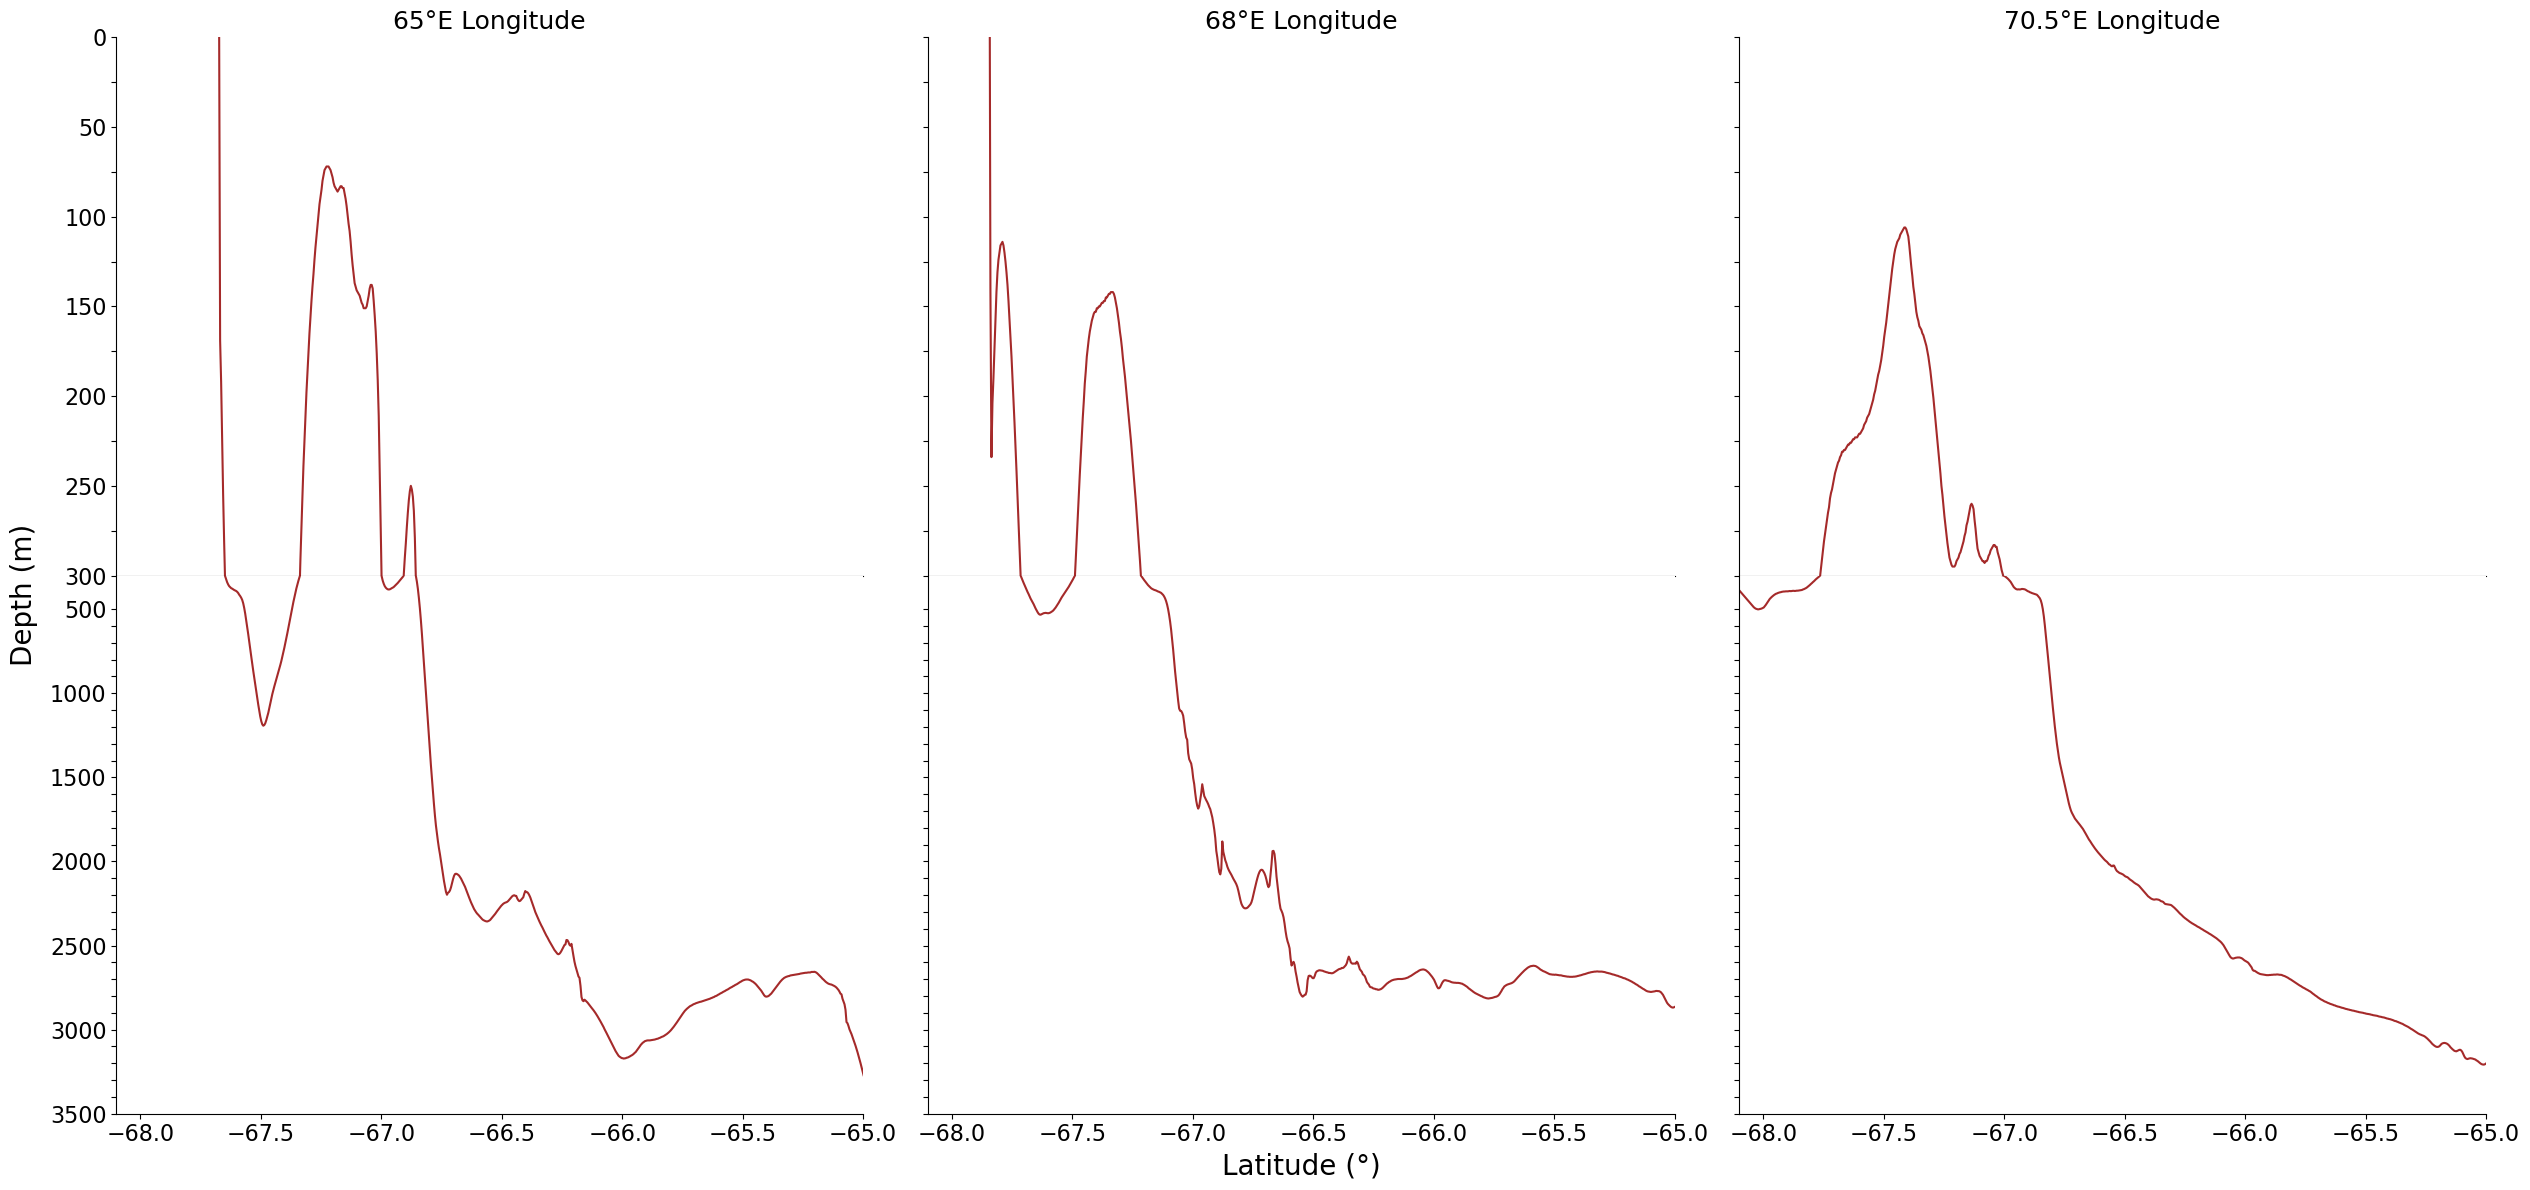

In [3]:
# Open the NetCDF file with xarray
gebco_full = xr.open_dataset('../Data/Final/bathymetry_data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Define the longitude lines
longitude_lines = [65, 68, 70.5]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(25, 12), sharey='row', gridspec_kw={'height_ratios': [1, 1], 'hspace': 0})

# Iterate through each longitude line
for i, lon in enumerate(longitude_lines):
    # Extract bathymetry data for the longitude line
    bathymetry_along_transect = gebco_full.sel(lon=lon, method='nearest')
    
    # Extract latitude and depth values
    latitude_values = bathymetry_along_transect['lat'].values
    depth_values = -bathymetry_along_transect['elevation'].values  # Negative values because bathymetry is negative
    
    # Plot the seafloor depths along the longitude line
    axs[0, i].plot(latitude_values, depth_values, color='brown', linestyle='-', label='Seafloor')
    axs[0, i].set_title(f'{lon}°E Longitude', fontsize=18)
    axs[0, i].set_ylim(0, 300)
    axs[0, i].set_xlim(-68.1, -65)
    axs[0, i].set_xticks([])  # Remove x-axis ticks
    axs[0, i].set_xticklabels([])

    # Add tick marks every 50m but leave labels every 100m
    # axs[0, i].set_yticks(range(0, 301, 50))
    # axs[0, i].set_yticklabels(['' if j % 100 != 0 else f'{j}' for j in range(0, 301, 50)]) #add labels every 100m, ticks every 50
    # axs[0, i].set_yticklabels([f'{j}' for j in range(0, 301, 50)]) # Add tick marks and labels every 50m
    # Add tick marks every 25m but label every 50m
    axs[0, i].set_yticks(range(0, 301, 25))
    axs[0, i].set_yticklabels(['' if j % 50 != 0 else f'{j}' for j in range(0, 301, 25)])

    # Remove top and right spines
    axs[0, i].spines['top'].set_visible(False)
    axs[0, i].spines['right'].set_visible(False)
    # Set font size for y-axis tick labels
    axs[0, i].tick_params(axis='y', labelsize=16)  # Adjust the font size as needed



    
    # Plot the seafloor depths along the longitude line for 300-3500m
    axs[1, i].plot(latitude_values, depth_values, color='brown', linestyle='-', label='Seafloor')
    # axs[1, i].set_xlabel('Latitude (°)', fontsize=14)
    # Set x-axis label only for the middle subplot
    if i == 1:
        axs[1, i].set_xlabel('Latitude (°)', fontsize=20)
    axs[1, i].set_ylim(300, 3500)
    axs[1, i].set_xlim(-68.1, -65)

    # Add tick marks every 100m but label every 500m
    axs[1, i].set_yticks(range(500, 3501, 100))
    axs[1, i].set_yticklabels(['' if j % 500 != 0 else f'{j}' for j in range(500, 3501, 100)])

    # Remove top and right spines
    axs[1, i].spines['top'].set_visible(False)
    axs[1, i].spines['right'].set_visible(False)
    axs[1, i].tick_params(axis='y', labelsize=16)  # Adjust the font size as needed
    axs[1, i].tick_params(axis='x', labelsize=16)  # Adjust the font size as needed

# Set common ylabel and invert y-axis for all subplots
fig.text(-.01, 0.5, 'Depth (m)', va='center', rotation='vertical', fontsize=20)  # Adjust the position as needed
axs[0, 0].invert_yaxis()
axs[1, 0].invert_yaxis()

# Adjust layout to prevent clipping of ylabel
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
# Define the longitude line
#west
# longitude_line = 65
#central
# longitude_line = 68
#east
longitude_line = 70.5

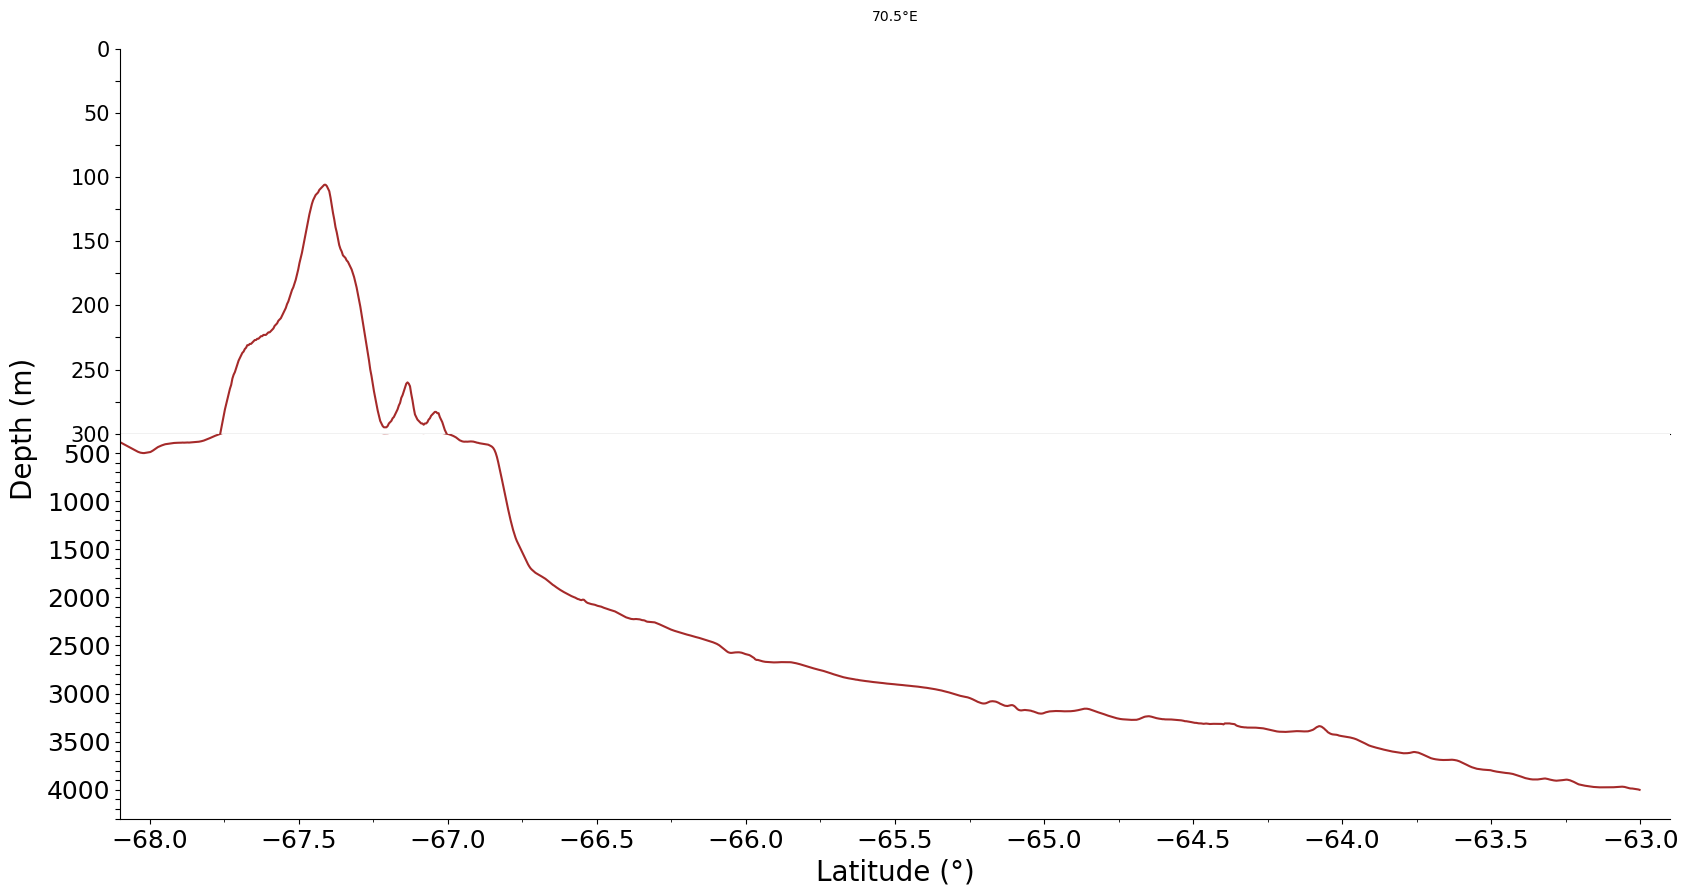

In [9]:
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Open the NetCDF file with xarray
gebco_full = xr.open_dataset('../Data/Final/bathymetry_data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')
# elevation = gebco_full.elevation.where(gebco_full.elevation < 0, np.nan)

# Extract bathymetry data for the longitude line
bathymetry_along_transect = gebco_full.sel(lon=longitude_line, method='nearest')

# Extract latitude and depth values
latitude_values = bathymetry_along_transect['lat'].values
depth_values = -bathymetry_along_transect['elevation'].values  # Negative values because bathymetry is negative




ax1.plot(latitude_values, depth_values, color='brown', linestyle='-', label='Seafloor')
ax1.set_ylim(0, 300)
ax1.set_xlim(-68.1, -62.9)
ax1.invert_yaxis()
ax1.set_xticklabels([])
# ax1.grid(linewidth=0.3, color='lightgray')
# Add tick marks every 100m but label every 500m
ax1.set_yticks(range(0, 301, 25))
ax1.set_yticklabels(['' if j % 50 != 0 else f'{j}' for j in range(0, 301, 25)])
# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Set font size for x and y-axis tick labels
ax1.tick_params(axis='both', labelsize=15)  # Adjust the font size as needed



ax2.plot(latitude_values, depth_values, color='brown', linestyle='-', label='Seafloor')
ax2.set_ylim(300, 4300)
ax2.set_xlim(-68.1, -62.9)
ax2.invert_yaxis()
ax2.set_xlabel('Latitude (°)', fontsize=10)
# ax2.grid(linewidth=0.3, color='lightgray')
# Add tick marks every 100m but label every 500m
ax2.set_yticks(range(500, 4301, 100))
ax2.set_yticklabels(['' if j % 500 != 0 else f'{j}' for j in range(500, 4301, 100)])
# Set major ticks at every degree and minor ticks at every 0.5 degree on the x-axis of the second subplot
ax2.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(0.25))
# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# Set font size for x and y-axis tick labels
ax2.tick_params(axis='both', labelsize=18)  # Adjust the font size as needed
ax2.set_xlabel('Latitude (°)', fontsize=20)

#use this for the not the bottom figure
# ax2.set_xticklabels([])
# ax2.set_xlabel('')  # Remove x-axis label




# Set the dynamic title based on the longitude line
ax1.set_title(f'{longitude_line}°E', fontsize=10, pad=20)


# Add y-axis title between the subplots
fig.text(0.07, 0.5, 'Depth (m)', va='center', rotation='vertical', fontsize=20)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0)

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

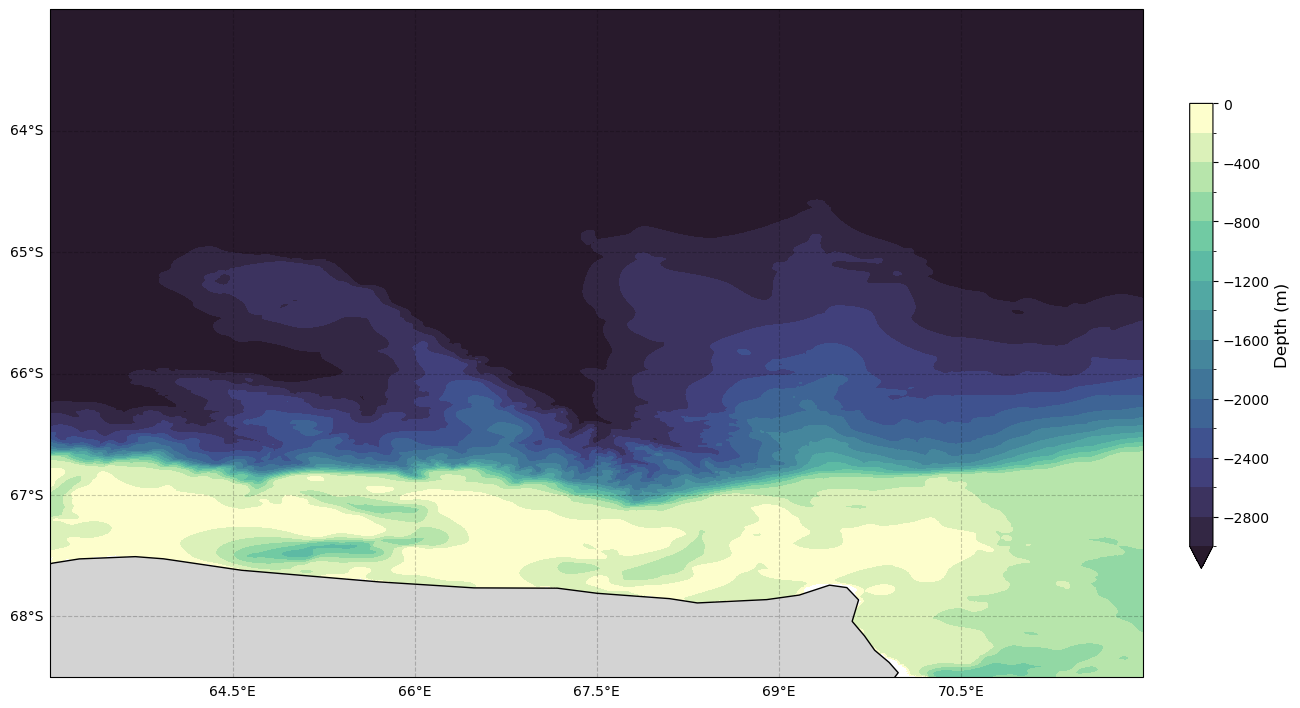

In [13]:
#visualise where your data is

# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')
feature = ax.add_feature(Coast,edgecolor='black',facecolor='lightgray') # need to find a better land mask than this.
ax.set_extent([63, 72, -68.5, -63])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco_full.elevation.where(gebco_full.elevation < 0, np.nan)

#add data
im = elevation.plot.contourf(x='lon',y='lat',cmap='cmo.deep_r',levels=np.array([*np.arange(-3000,200,200)]),add_colorbar=False)


#add colourbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Depth (m)', fontsize=12)

# plt.title('argo')

plt.show()

In [16]:
#load in the 2000m contour 
# this was calculated in the notebook 'calculating_depth_contours.ipynb'
slope_contour = np.load('contour_coordinates_slope_2000m.npy')

In [17]:
# Load in the shelf polygon coordinates from the CSV
polygon_slope_coords = pd.read_csv('polygon_slope.csv')

# Create a Shapely Polygon from the coordinates
polygon_slope = Polygon(zip(polygon_slope_coords['X'], polygon_slope_coords['Y']))

# Extract X and Y coordinates
x = polygon_slope_coords['X'].tolist()
y = polygon_slope_coords['Y'].tolist()

In [18]:
# Load the polynya contour
data = np.load('../Data/Raw/CDpol_coordinates.npz')
CDpol_lon = data['lon']
CDpol_lat = data['lat']

In [19]:
# Load the fast ice tongue contour
data = np.load('../Data/Raw/CDfastice_coordinates.npz')
CD_fast_ice_lon = data['lon']
CD_fast_ice_lat = data['lat']

<Figure size 640x480 with 0 Axes>

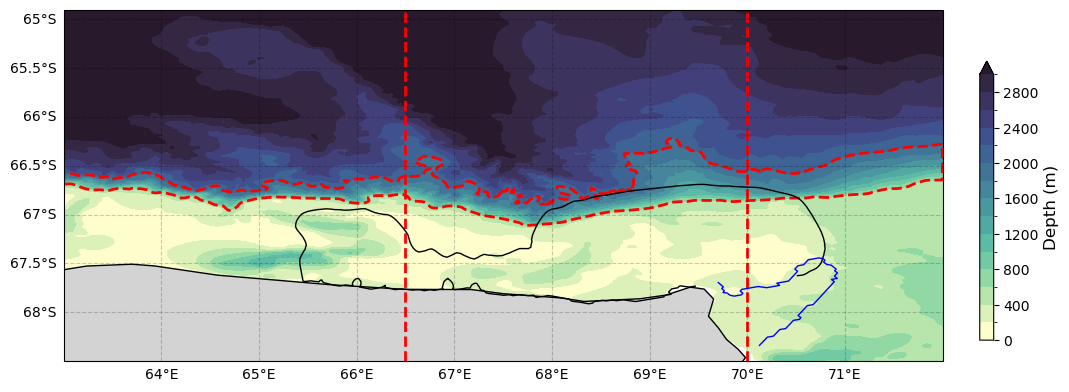

In [20]:
#This plots the polygon on the map to check it works

# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12,12])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
# gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
# gl.right_labels = False
# gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')
feature = ax.add_feature(Coast,edgecolor='black',facecolor='lightgray') # need to find a better land mask than this.
ax.set_extent([63, 72, -68.5, -64.9])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Set longitude tick marks every 1 degree
ax.set_xticks(np.arange(63, 73, 1), crs=ccrs.PlateCarree())

# Remove the default x-axis tick marks and labels
ax.set_xticks([])

# Hide the x-axis title
ax.xaxis.set_visible(False)

# Add gridlines with the new tick marks
gl = ax.gridlines(draw_labels=True, color='black', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1))
gl.right_labels = False
gl.top_labels = False


# Use the custom colormap with light gray color for values >= 0
elevation = gebco_full.elevation.where(gebco_full.elevation < 0, np.nan)
elevation = -1 * elevation


#add data
im = elevation.plot.contourf(x='lon',y='lat',cmap='cmo.deep',levels=np.array([*np.arange(0,3200,200)]),add_colorbar=False)

# Add a contour line for the 600m isobath
##contour_line_coordinates comes from 'CTD mapping seals and CTD with type' notebook. 
#ax.plot(contour_line_coordinates[:, 0], contour_line_coordinates[:, 1], color='white', linewidth=3)

# # Plot the result using Matplotlib
# x, y = polygon.exterior.xy

# Plot the contour polygon
ax.plot(x, y, color='red', linewidth=2, linestyle='--')

# Add red lines at longitude 66.5 and 70
ax.axvline(66.5, color='red', linewidth=2, linestyle='--')
ax.axvline(70, color='red', linewidth=2, linestyle='--')

# Plot the data with a solid line
plt.plot(CDpol_lon, CDpol_lat, linewidth=1, linestyle='-', color='black')
# Plot the data with a solid line
plt.plot(CD_fast_ice_lon, CD_fast_ice_lat, linewidth=1, linestyle='-', color='blue') 


# Create a colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.015, pad=0.04)
cbar.set_label('Depth (m)', fontsize=12)

plt.show()

In [65]:
gebco_full = xr.open_dataset('../Data/Final/bathymetry_data/gebco_2023_n-62.0_s-69.0_w62.0_e73.0.nc', engine='netcdf4')

<Figure size 640x480 with 0 Axes>

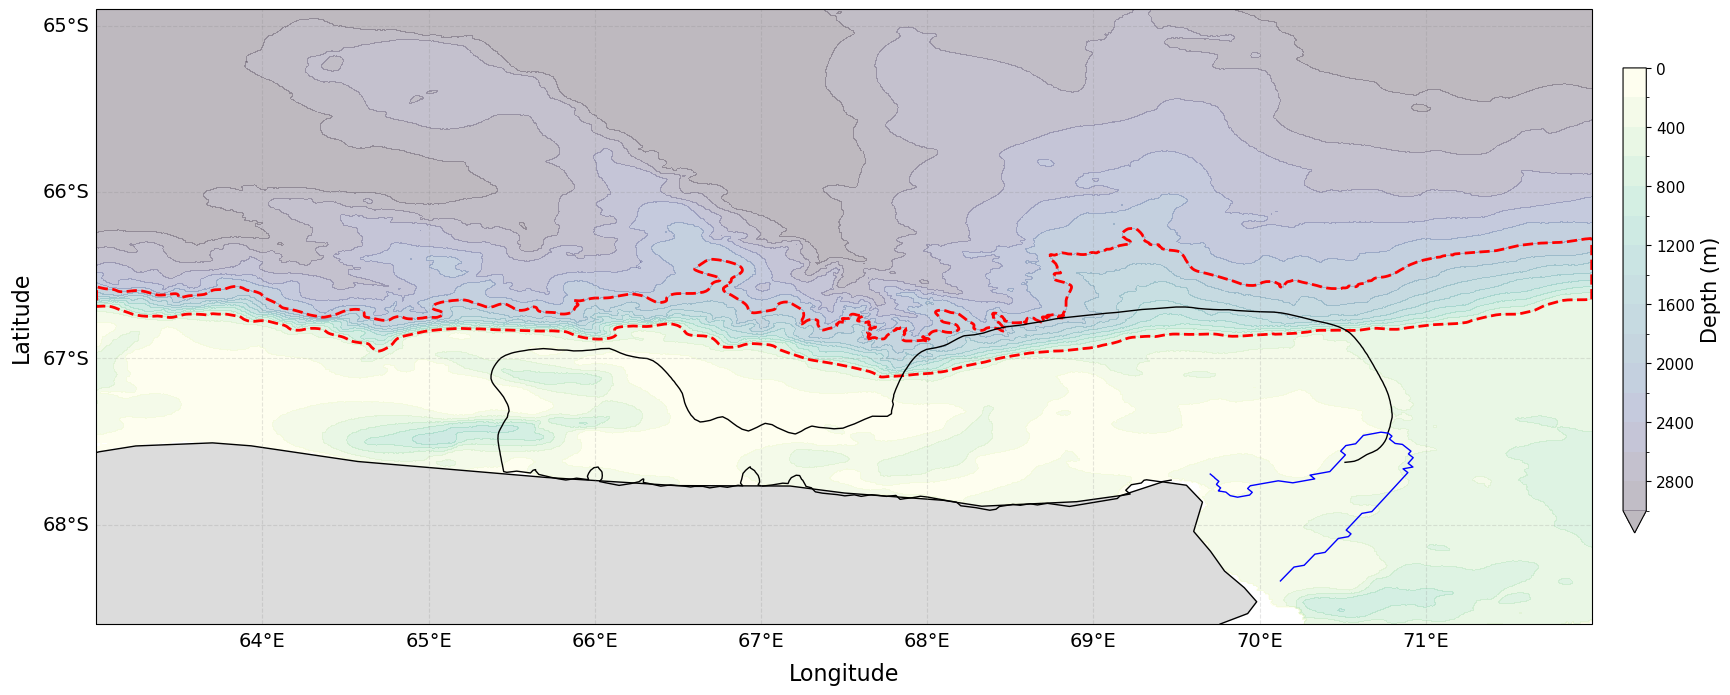

In [83]:
plt.clf()
fig = plt.figure(figsize=[20,15])

# Create an axis with PlateCarree projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Decorate the axis with gridlines and coastlines
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
# gl.xlocator = mticker.MultipleLocator(0.5)  # Set x-axis grid every 0.5 degrees
# gl.ylocator = mticker.MultipleLocator(0.5)  # Set y-axis grid every 0.5 degrees
gl.xlocator = mticker.FixedLocator(range(63, 73, 1))  # Set x-axis grid every 1 degree
gl.ylocator = mticker.FixedLocator(range(-69, -63, 1))  # Set y-axis grid every 1 degree
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}


Coast = cfeature.NaturalEarthFeature(category='physical', scale='50m', facecolor='none', name='coastline')
feature = ax.add_feature(Coast, edgecolor='black', facecolor='gainsboro')  # need to find a better land mask than this.
ax.set_extent([63, 72, -68.6, -64.9])

# Use the custom colormap with light gray color for values >= 0
elevation = gebco_full.elevation.where(gebco_full.elevation < 0, np.nan)
elevation = -1 * elevation


#add data
im = elevation.plot.contourf(x='lon',y='lat',cmap='cmo.deep',levels=np.array([*np.arange(0,3200,200)]),add_colorbar=False, alpha=0.3)

# Create a colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.015, pad=0.02)
# Set the font size of the colorbar tick labels
cbar.ax.tick_params(labelsize=11)
cbar.set_label('Depth (m)', fontsize=15)
# Invert the colorbar
cbar.ax.invert_yaxis()

# Plot the contour polygon
ax.plot(x, y, color='red', linewidth=2, linestyle='--')


# Plot the data with a solid line
ax.plot(CDpol_lon, CDpol_lat, linewidth=1, linestyle='-', color='black')
# Plot the data with a solid line
ax.plot(CD_fast_ice_lon, CD_fast_ice_lat, linewidth=1, linestyle='-', color='blue') 

# Add axis titles
ax.text(0.5, -0.08, 'Longitude', ha='center', va='center', transform=ax.transAxes, fontsize=16)
ax.text(-0.05, 0.5, 'Latitude', ha='center', va='center', transform=ax.transAxes, rotation='vertical', fontsize=16)


plt.show()


<Figure size 640x480 with 0 Axes>

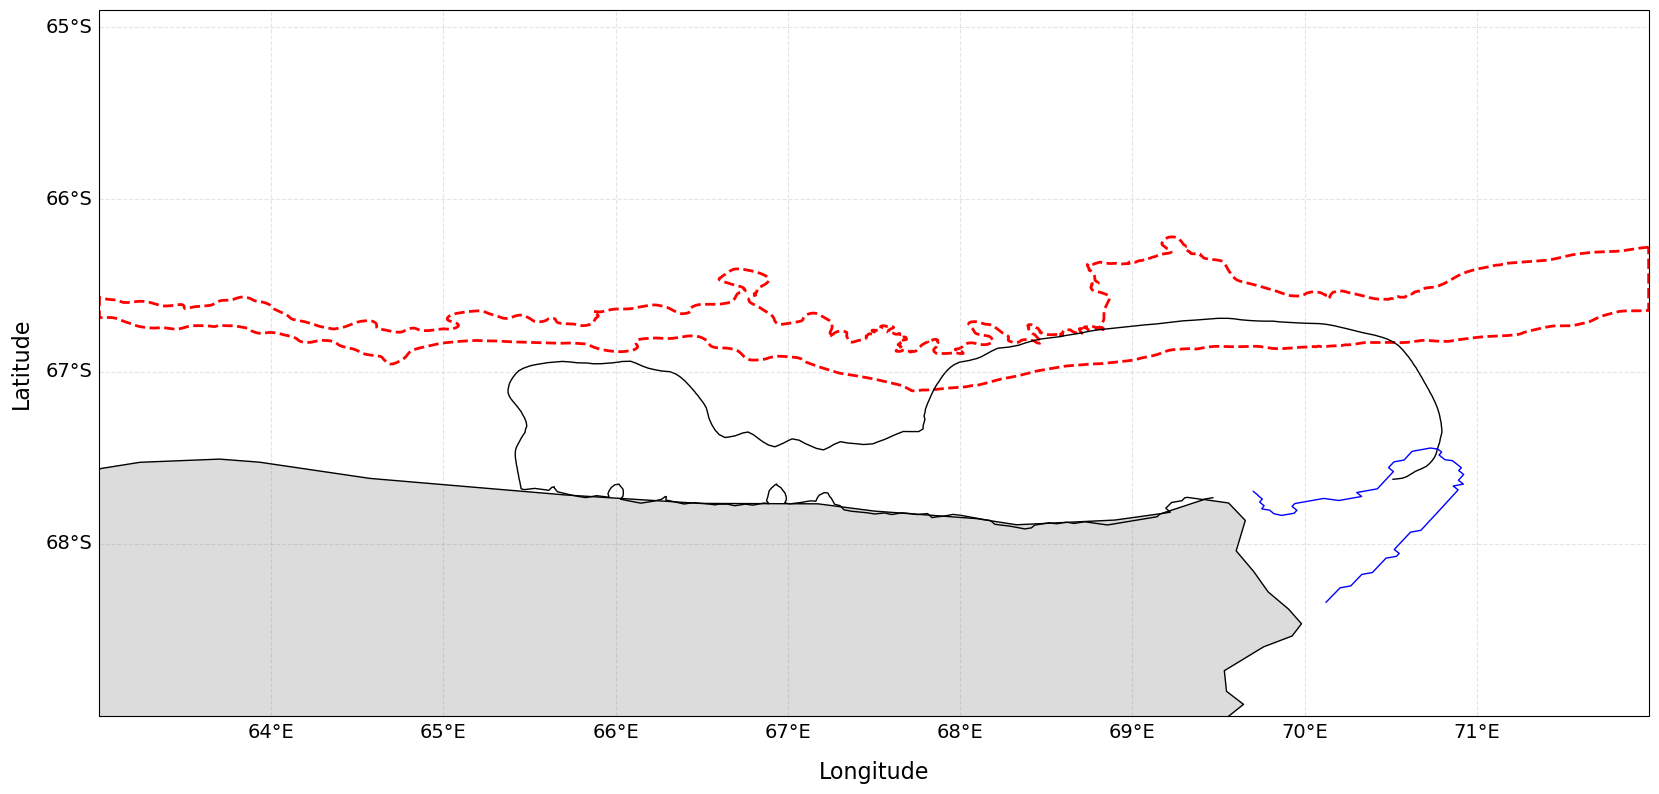

In [63]:
plt.clf()
fig = plt.figure(figsize=[20,10])

# Create an axis with PlateCarree projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Decorate the axis with gridlines and coastlines
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
# gl.xlocator = mticker.MultipleLocator(0.5)  # Set x-axis grid every 0.5 degrees
# gl.ylocator = mticker.MultipleLocator(0.5)  # Set y-axis grid every 0.5 degrees
gl.xlocator = mticker.FixedLocator(range(63, 73, 1))  # Set x-axis grid every 1 degree
gl.ylocator = mticker.FixedLocator(range(-69, -63, 1))  # Set y-axis grid every 1 degree
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}


Coast = cfeature.NaturalEarthFeature(category='physical', scale='50m', facecolor='none', name='coastline')
feature = ax.add_feature(Coast, edgecolor='black', facecolor='gainsboro')  # need to find a better land mask than this.
ax.set_extent([63, 72, -69, -64.9])


# Plot the contour polygon
ax.plot(x, y, color='red', linewidth=2, linestyle='--')


# Plot the data with a solid line
ax.plot(CDpol_lon, CDpol_lat, linewidth=1, linestyle='-', color='black')
# Plot the data with a solid line
ax.plot(CD_fast_ice_lon, CD_fast_ice_lat, linewidth=1, linestyle='-', color='blue') 

# Add axis titles
ax.text(0.5, -0.08, 'Longitude', ha='center', va='center', transform=ax.transAxes, fontsize=16)
ax.text(-0.05, 0.5, 'Latitude', ha='center', va='center', transform=ax.transAxes, rotation='vertical', fontsize=16)


plt.show()
